In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('insurance.csv')

df.shape

In [ ]:
df.head(20)

In [5]:
df.isnull().sum()
#O dataframe não contém valores nulos.


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

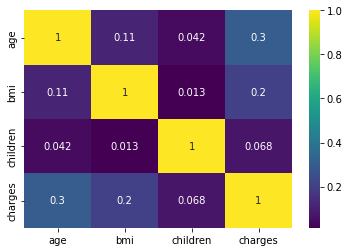

In [7]:
corr = df.corr()
sns.heatmap(corr, cmap = 'viridis', annot = True)
#Correlação entre as variáveis

<ipython-input-8-f6b918f4cc40>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], bins=50, color='b', ax=ax)
<ipython-input-8-f6b918f4cc40>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']), bins=40, color='r', ax=ax)


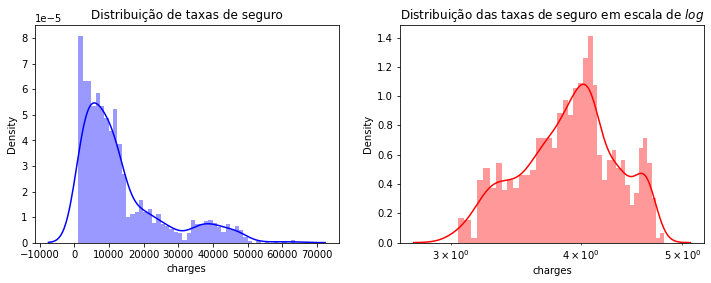

In [8]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(121)
sns.distplot(df['charges'], bins=50, color='b', ax=ax)
ax.set_title('Distribuição de taxas de seguro')

ax = fig.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins=40, color='r', ax=ax)
ax.set_title('Distribuição das taxas de seguro em escala de $log$')
ax.set_xscale('log');

relação entre Índice de massa corporal e  o custo

Text(0.5, 1.0, 'Relação entre índice de massa corporal e o custo')

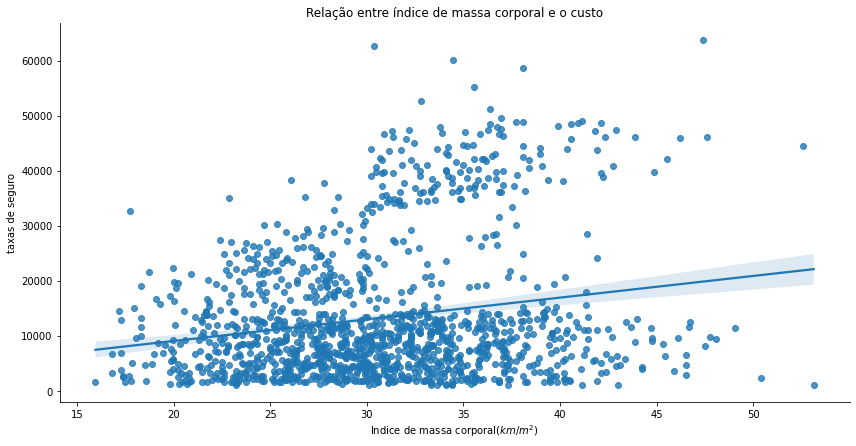

In [9]:
sns.lmplot(x = 'bmi', y = 'charges', data=df, aspect = 2, height=6)
plt.xlabel('Indice de massa corporal$(km/m^2$)')
plt.ylabel('taxas de seguro')

plt.title('Relação entre índice de massa corporal e o custo')

Existe relação entre o sexualidade e o custo do seguro?

Text(0.5, 1.0, 'Gráfico Custo vs sexo')

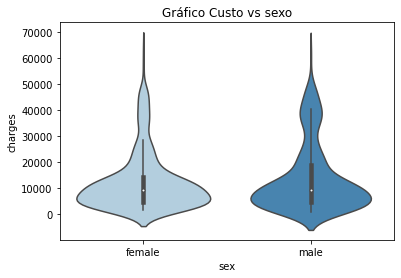

In [10]:
fig = plt.figure()
sns.violinplot(x ='sex', y='charges', data=df, palette= "Blues")
plt.title('Gráfico Custo vs sexo')


Existe relação entre o custo do seguro e a pessoa ser fumante?

Text(0.5, 1.0, 'Gráfico violino de Custo vs Fumante')

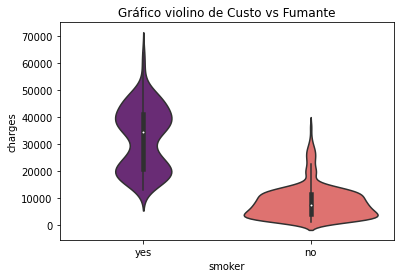

In [11]:
sns.violinplot(x='smoker', y='charges', data=df, palette = 'magma')
plt.title('Gráfico violino de Custo vs Fumante')

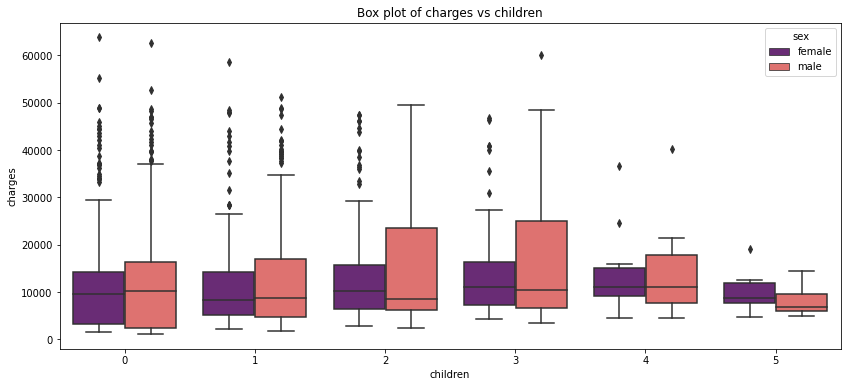

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='magma')
plt.title('Box plot of charges vs children');

Vamos verificar os valores mínimos/ máximos e a média relacionados à quantidade de crianças e o custo do Seguro

In [13]:
valores = ['mean','min','max']
df.groupby('children').agg(valores)['charges']

<ipython-input-13-f149ac0eb5ac>:2: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('children').agg(valores)['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Vamos observar o comportamento do custo relacionando idade e fumante

Text(0.5, 1.0, 'Custo vs Índice de Massa corporal')

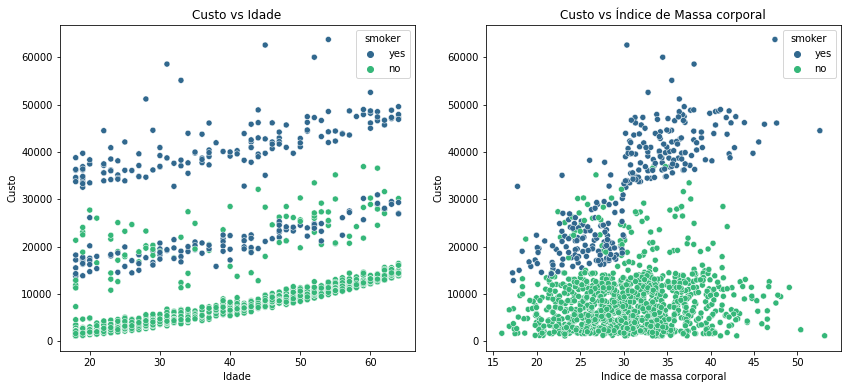

In [14]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
sns.scatterplot( x = 'age', y ='charges', data=df, palette = 'viridis', hue = 'smoker', ax=ax)
plt.ylabel('Custo')
plt.xlabel('Idade')
ax.set_title('Custo vs Idade')

ax = fig.add_subplot(122)
sns.scatterplot( x = 'bmi', y ='charges', data=df, palette = 'viridis', hue = 'smoker', ax=ax)
plt.ylabel('Custo')
plt.xlabel('Indice de massa corporal')
ax.set_title('Custo vs Índice de Massa corporal')


## Pre-processamento dos dados


In [15]:
categorical_columns = ['sex', 'children', 'smoker', 'region']
#Vamos aplicar o Label Encoding nesse caso.

df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
                           columns = categorical_columns,
                           drop_first = True,
                           dtype='int8')


In [16]:
df_encode.head(10)

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
5,31,25.740,3756.62160,0,0,0,0,0,0,0,0,1,0
6,46,33.440,8240.58960,0,1,0,0,0,0,0,0,1,0
7,37,27.740,7281.50560,0,0,0,1,0,0,0,1,0,0
8,37,29.830,6406.41070,1,0,1,0,0,0,0,0,0,0
9,60,25.840,28923.13692,0,0,0,0,0,0,0,1,0,0


In [17]:
print('Colunas originais do dataset:\n',df.columns.values)
print('\nNumero de linhas e colunas do dataset:', df.shape)
print('\n Colunas no dataframe depois do encoding dummy variable:\n',df_encode.columns.values)
print('\nNumero de linhas and colunas in the dataset:',df_encode.shape)

Colunas originais do dataset:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Numero de linhas e colunas do dataset: (1338, 7)

 Colunas no dataframe depois do encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Numero de linhas and colunas in the dataset: (1338, 13)


In [ ]:
from scipy.stats import boxcox
y_bc,lam, ci = boxcox(df_encode['charges'], alpha =0.05)

ci, lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [ ]:
df_encode['charges'] = np.log(df_encode['charges'])

In [18]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges', axis=1)
y = df_encode['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=23)

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [23]:
r_score = lr.score(X,y)
print('Coeficiente de Determinação $R^2$:', r_score)
print('Intercept:', lr.intercept_)

Coeficiente de Determinação $R^2$: 0.751049472528228
Intercept: -11738.954855430975


In [ ]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns = ['Coeficientes'])
coeff_df

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

ypredict = lr.predict(X_test)

mean_absolute_error(y_test, ypredict)



4037.1569388512075

In [40]:
print('MAE:', mean_absolute_error(y_test, ypredict))


print('MSE:', mean_squared_error(y_test, ypredict))


print('RMSE:', np.sqrt(mean_squared_error(y_test, ypredict)))

MAE: 4037.1569388512075
MSE: 35152074.79986037
RMSE: 5928.918518571526


# Regressão LASSO

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)


Lasso(alpha=0.5)

In [53]:
scores = []
alphas = [0.001, 0.01, 0.1, 0.5, 1]

for i in range(len(alphas)):
  lasso = Lasso(alpha = alphas[i])
  lasso.fit(X_train, y_train)
  score = lasso.score(X_train, y_train)
  scores.append(score)

scores

[0.7578702899687431,
 0.757870289796653,
 0.7578702725869173,
 0.7578698554289669,
 0.7578685515898644]

#Regressão Ridge


In [54]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha = 0.5)
clf.fit(X_train, y_train)


Ridge(alpha=0.5)

In [57]:
scoresR = []
alphas = [0.001, 0.01, 0.1, 0.5, 1]

for i in range(len(alphas)):
  clf = Ridge(alpha = alphas[i])
  clf.fit(X_train,y_train)
  score = clf.score(X_train, y_train)
  scoresR.append(score)

scoresR

[0.7578702899319176,
 0.7578702861158829,
 0.7578699062592319,
 0.7578608835502253,
 0.7578335293653387]